# Ejemplo regresión con arboles de decisión y random forest
Este ejemplo ha sido construido para la clase de inteligencia artificial IA-2022-I del programa de Ingeniería de Sistemas de la Universidad del Magdalena. El ejemplo ilustra el uso de las clases DecisionTreeRegressor y RandomForestRegressor sobre el conjunto de datos de ejemplos California Housing disponible también en la librería Sickit-Learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn.model_selection import train_test_split

%matplotlib inline

Se carga el conjunto de datos California Housing, cuyo objetivo es predecir el valor promedio de una casa con base en 8 características que tienen que ver con el número de habitaciones promedios de la casa, la antiguedad, el ingreso promedio de los habitantes de la casa, la ubicación, etc.

In [2]:

heart = pd.read_csv("./heart.csv")
X = pd.DataFrame(data=heart)

#print(heart.info())
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [3]:
y = heart.HeartDisease
print(y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


In [4]:
#3.
#Verificando que no haya valores nulos en los ejemplos del conjunto
X.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

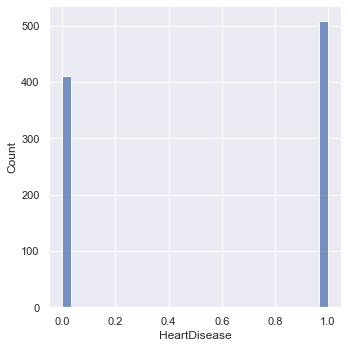

In [5]:
#Distribución de la variable a predecir
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(y, bins=30)
plt.show()

Convirtiendo Variables Categoricas A Numericas 
Sex , ChestPainType , RestingECG , ExerciseAngina , ST_Slope . 
Teniendo en cuenta El orden Factorize , No orden onehotEncoding.


In [6]:
from sklearn import preprocessing

labelEnc = preprocessing.LabelEncoder()
new_target = labelEnc.fit_transform(X['Sex'])
onehotEnc = preprocessing.OneHotEncoder()
onehotEnc.fit(new_target.reshape(-1, 1))
targets_trans = onehotEnc.transform(new_target.reshape(-1, 1))
X['Sex'] = targets_trans.toarray()
#no orden

heartclass = X['ChestPainType']
heartclass_econded, heartclass_categories = heartclass.factorize()
X['ChestPainType'] = heartclass_econded
#orden

labelEnc = preprocessing.LabelEncoder()
new_target = labelEnc.fit_transform(X['RestingECG'])
onehotEnc = preprocessing.OneHotEncoder()
onehotEnc.fit(new_target.reshape(-1, 1))
targets_trans = onehotEnc.transform(new_target.reshape(-1, 1))
X['RestingECG'] = targets_trans.toarray()
#no orden

labelEnc = preprocessing.LabelEncoder()
new_target = labelEnc.fit_transform(X['ExerciseAngina'])
onehotEnc = preprocessing.OneHotEncoder()
onehotEnc.fit(new_target.reshape(-1, 1))
targets_trans = onehotEnc.transform(new_target.reshape(-1, 1))
X['ExerciseAngina'] = targets_trans.toarray()
#no orden

heartclass = X['ST_Slope']
heartclass_econded, heartclass_categories = heartclass.factorize()
X['ST_Slope'] = heartclass_econded
print(heart.info())
#orden



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    float64
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    float64
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    float64
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 86.2 KB
None


<AxesSubplot:>

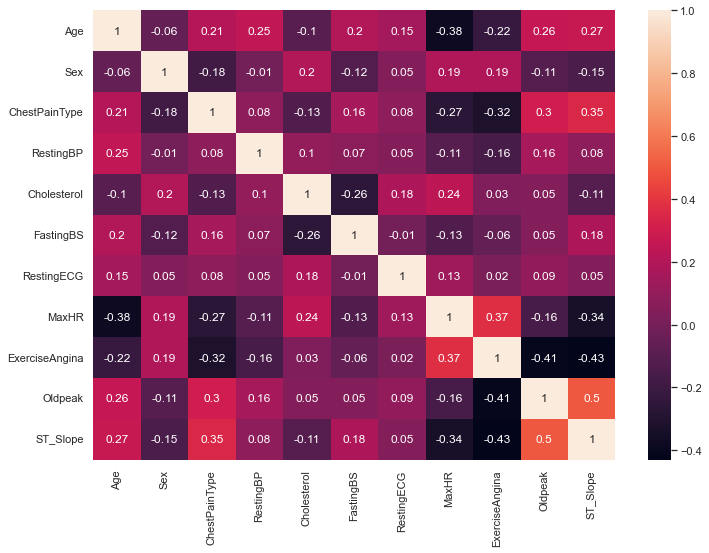

In [7]:
#Matriz de correlación para inspeccionar posibles variables predictoras relacionadas entre sí
X = X.iloc[:, 0:11]
correlation_matrix = X.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [8]:
#Partición del conjunto de datos en entrenamiento y prueba. Un 30 por ciento de los datos totales se reserva para prueba
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

Se utilizará la clase DecisionTreeRegressor para construir un árbol de decisión que luego se evalúa en el conjunto de datos reservado para prueba

In [9]:
#Funciones requeridas para implementar un arbol de decisión para regresión y las métricas de evaluación
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Entrenamiento del modelo
#clf = tree.DecisionTreeClassifier()
clf = tree.DecisionTreeRegressor()
clf.fit(Xtrain, Ytrain)

DecisionTreeRegressor()

In [10]:
#Evaluación del modelo entrenado en el conjunto de datos de entrenamiento y prueba
Ytrain_predict = clf.predict(Xtrain)
rmse = (np.sqrt(mean_squared_error(Ytrain, Ytrain_predict)))
r2 = r2_score(Ytrain, Ytrain_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
Ytest_predict = clf.predict(Xtest)
rmse = (np.sqrt(mean_squared_error(Ytest, Ytest_predict)))
r2 = r2_score(Ytest, Ytest_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.0
R2 score is 1.0


The model performance for testing set
--------------------------------------
RMSE is 0.44640269076120115
R2 score is 0.19336840427227808


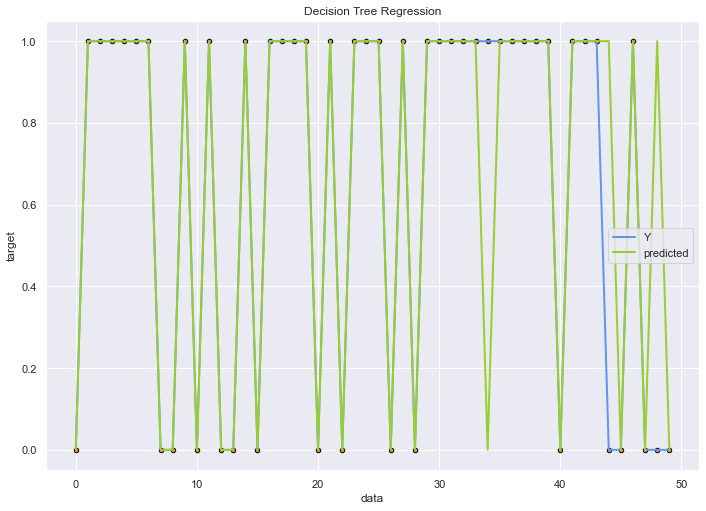

In [11]:
# Plot the results
x =  np.arange(0.0, 50)[:, np.newaxis]
plt.figure()
plt.scatter(x, Ytest[:50], s=20, edgecolor="black", c="darkorange")
plt.plot(x, Ytest[:50], color="cornflowerblue", label="Y", linewidth=2)
plt.plot(x, Ytest_predict[:50], color="yellowgreen", label="predicted", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Se utiliza la clase RandomForestRegressor para construir un modelo ensamblado, conformado por varios árboles de decisión, en los resultados se puede ver que el modelo final no queda tan sobreajustado a los datos de entrenamiento, y tiene una mejor evaluación en los datos reservados para la prueba

In [12]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=50, max_depth=20)
regr.fit(Xtrain, Ytrain)


RandomForestRegressor(max_depth=20, n_estimators=50)

In [13]:
Ytrain_predict2 = regr.predict(Xtrain)
rmse = (np.sqrt(mean_squared_error(Ytrain, Ytrain_predict2)))
r2 = r2_score(Ytrain, Ytrain_predict2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
Ytest_predict2 = regr.predict(Xtest)
rmse = (np.sqrt(mean_squared_error(Ytest, Ytest_predict2)))
r2 = r2_score(Ytest, Ytest_predict2)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.12823265460546746
R2 score is 0.9334792599499435


The model performance for testing set
--------------------------------------
RMSE is 0.3157874904590661
R2 score is 0.596343950263032


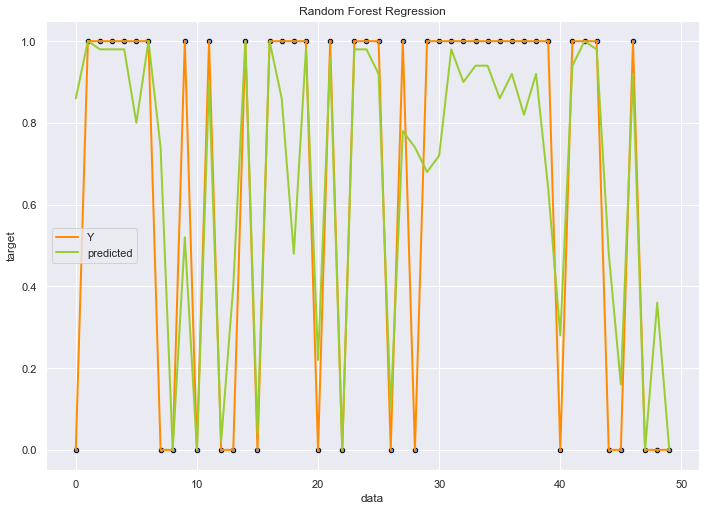

In [14]:
# Plot the results
x =  np.arange(0.0, 50)[:, np.newaxis]
plt.figure()
plt.scatter(x, Ytest[:50], s=20, edgecolor="black", c="cornflowerblue")
plt.plot(x, Ytest[:50], color="darkorange", label="Y", linewidth=2)
plt.plot(x, Ytest_predict2[:50], color="yellowgreen", label="predicted", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Random Forest Regression")
plt.legend()
plt.show()